In [185]:
import os

def mkdir(p):
    if not os.path.exists(p):
        os.mkdir(p)

def link(src, dst):
    if not os.path.exists(dst):
        os.symlink(src, dst, target_is_directory=True)

mkdir('/Users/puspakamaloli/Desktop/large_files/fruits-360-small')

In [186]:
classes = [
    'Apple',
    'Avocado',
    'Lemon',
    'Mango',
    'Kiwi',
    'Banana',
    'Strawberry',
    'Raspberry',
    'Pomegranate',
    'Watermelon',
    'Papaya',
    'Peach',
    'Pear',
    'Watermelon',
    'Guava',
    'Orange',
    'Pineapple'
]

In [187]:
train_path_from = os.path.abspath('/Users/puspakamaloli/Desktop/large_files/fruits-360/Training')
valid_path_from = os.path.abspath('/Users/puspakamaloli/Desktop/large_files/fruits-360/Validation')

train_path_to = os.path.abspath('/Users/puspakamaloli/Desktop/large_files/fruits-360-small/Training')
valid_path_to = os.path.abspath('/Users/puspakamaloli/Desktop/large_files/fruits-360-small/Validation')

mkdir(train_path_to)
mkdir(valid_path_to)
for c in classes:
    link(train_path_from + '/' + c, train_path_to + '/' + c)
    link(valid_path_from + '/' + c, valid_path_to + '/' + c)


In [188]:
from __future__ import print_function, division
from builtins import range, input
# Note: you may need to update your version of future
# sudo pip install -U future

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.resnet import ResNet50, preprocess_input
# from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

from glob import glob

In [189]:

epochs = 16
batch_size = 32
IMAGE_SIZE = [150, 150] # feel free to change depending on dataset


train_path = '/Users/puspakamaloli/Desktop/large_files/fruits-360-small/Training'
valid_path = '/Users/puspakamaloli/Desktop/large_files/fruits-360-small/Validation'


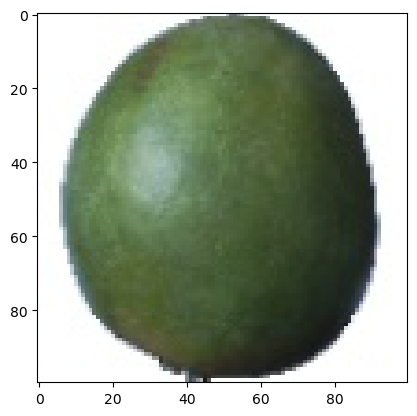

In [190]:
# useful for getting number of files
image_files = glob(train_path + '/*/*.jp*g')
valid_image_files = glob(valid_path + '/*/*.jp*g')

# useful for getting number of classes
folders = glob(train_path + '/*')


# look at an image for fun
plt.imshow(image.load_img(np.random.choice(image_files)))
plt.show()

In [191]:
res = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [192]:
# don't train existing weights
for layer in res.layers:
    layer.trainable = False

In [193]:
# our layers - you can add more if you want
x = Flatten()(res.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [194]:
# create a model object
model = Model(inputs=res.input, outputs=prediction)

# view the structure of the model
model.summary()


Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_10 (InputLayer)       [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 156, 156, 3)          0         ['input_10[0][0]']            
                                                                                                  
 conv1_conv (Conv2D)         (None, 75, 75, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 75, 75, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                       

                                                                                                  
 conv2_block3_1_conv (Conv2  (None, 38, 38, 64)           16448     ['conv2_block2_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, 38, 38, 64)           256       ['conv2_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block3_1_relu (Activ  (None, 38, 38, 64)           0         ['conv2_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_blo

 ation)                                                                                           
                                                                                                  
 conv3_block2_3_conv (Conv2  (None, 19, 19, 512)          66048     ['conv3_block2_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block2_3_bn (BatchNo  (None, 19, 19, 512)          2048      ['conv3_block2_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block2_add (Add)      (None, 19, 19, 512)          0         ['conv3_block1_out[0][0]',    
                                                                     'conv3_block2_3_bn[0][0]']   
          

 conv4_block1_2_conv (Conv2  (None, 10, 10, 256)          590080    ['conv4_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block1_2_bn (BatchNo  (None, 10, 10, 256)          1024      ['conv4_block1_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_2_relu (Activ  (None, 10, 10, 256)          0         ['conv4_block1_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_0_conv (Conv2  (None, 10, 10, 1024)         525312    ['conv3_block4_out[0][0]']    
 D)       

                                                                                                  
 conv4_block3_out (Activati  (None, 10, 10, 1024)         0         ['conv4_block3_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv4_block4_1_conv (Conv2  (None, 10, 10, 256)          262400    ['conv4_block3_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv4_block4_1_bn (BatchNo  (None, 10, 10, 256)          1024      ['conv4_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block6_3_bn (BatchNo  (None, 10, 10, 1024)         4096      ['conv4_block6_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block6_add (Add)      (None, 10, 10, 1024)         0         ['conv4_block5_out[0][0]',    
                                                                     'conv4_block6_3_bn[0][0]']   
                                                                                                  
 conv4_block6_out (Activati  (None, 10, 10, 1024)         0         ['conv4_block6_add[0][0]']    
 on)                                                                                              
          

 conv5_block3_1_relu (Activ  (None, 5, 5, 512)            0         ['conv5_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block3_2_conv (Conv2  (None, 5, 5, 512)            2359808   ['conv5_block3_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block3_2_bn (BatchNo  (None, 5, 5, 512)            2048      ['conv5_block3_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block3_2_relu (Activ  (None, 5, 5, 512)            0         ['conv5_block3_2_bn[0][0]']   
 ation)   

In [195]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='rmsprop',
  metrics=['accuracy']
)



# create an instance of ImageDataGenerator
gen = ImageDataGenerator(
  rotation_range=20,
  width_shift_range=0.1,
  height_shift_range=0.1,
  shear_range=0.1,
  zoom_range=0.2,
  horizontal_flip=True,
  vertical_flip=True,
  preprocessing_function=preprocess_input
)

In [196]:
# test generator to see how it works and some other useful things

# get label mapping for confusion matrix plot later
test_gen = gen.flow_from_directory(valid_path, target_size=IMAGE_SIZE)
print(test_gen.class_indices)

Found 2594 images belonging to 16 classes.
{'Apple': 0, 'Avocado': 1, 'Banana': 2, 'Guava': 3, 'Kiwi': 4, 'Lemon': 5, 'Mango': 6, 'Orange': 7, 'Papaya': 8, 'Peach': 9, 'Pear': 10, 'Pineapple': 11, 'Pomegranate': 12, 'Raspberry': 13, 'Strawberry': 14, 'Watermelon': 15}


In [197]:
labels = [None] * len(test_gen.class_indices)
for k, v in test_gen.class_indices.items():
    labels[v] = k


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


min: -109.68 max: 151.061


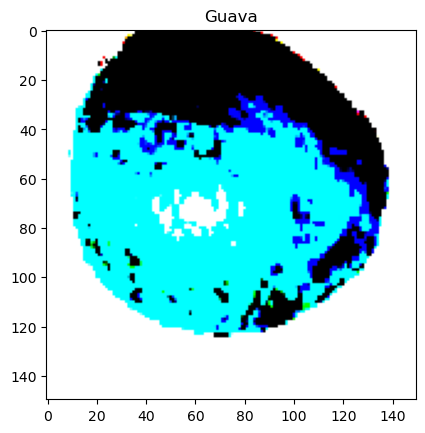

In [198]:
# should be a strangely colored image (due to VGG weights being BGR)
for x, y in test_gen:
    print("min:", x[0].min(), "max:", x[0].max())
    plt.title(labels[np.argmax(y[0])])
    plt.imshow(x[0])
    plt.show()
    break

In [199]:
# create generators
train_generator = gen.flow_from_directory(
  train_path,
  target_size=IMAGE_SIZE,
  shuffle=True,
  batch_size=batch_size,
)
valid_generator = gen.flow_from_directory(
  valid_path,
  target_size=IMAGE_SIZE,
  shuffle=True,
  batch_size=batch_size,
)

Found 7678 images belonging to 16 classes.
Found 2594 images belonging to 16 classes.


In [200]:



# fit the model
r = model.fit(
  train_generator,
  validation_data=valid_generator,
  epochs=epochs,
  steps_per_epoch=len(image_files) // batch_size,
  validation_steps=len(valid_image_files) // batch_size,
)


Epoch 1/16
239/239 [==============================] - 176s 731ms/step - loss: 0.9342 - accuracy: 0.9489 - val_loss: 2.1607 - val_accuracy: 0.9306
Epoch 2/16
239/239 [==============================] - 178s 744ms/step - loss: 0.0686 - accuracy: 0.9927 - val_loss: 3.0267 - val_accuracy: 0.8943
Epoch 3/16
239/239 [==============================] - 177s 742ms/step - loss: 0.0481 - accuracy: 0.9966 - val_loss: 0.4857 - val_accuracy: 0.9610
Epoch 4/16
239/239 [==============================] - 177s 742ms/step - loss: 0.0332 - accuracy: 0.9966 - val_loss: 0.8334 - val_accuracy: 0.9522
Epoch 5/16
239/239 [==============================] - 178s 746ms/step - loss: 0.0227 - accuracy: 0.9975 - val_loss: 3.0132 - val_accuracy: 0.9356
Epoch 6/16
239/239 [==============================] - 179s 748ms/step - loss: 0.0128 - accuracy: 0.9991 - val_loss: 1.8573 - val_accuracy: 0.9375
Epoch 7/16
239/239 [==============================] - 180s 755ms/step - loss: 0.0055 - accuracy: 0.9988 - val_loss: 2.2474 -

In [201]:
def get_confusion_matrix(data_path, N):
  # we need to see the data in the same order
  # for both predictions and targets
    print("Generating confusion matrix", N)
    predictions = []
    targets = []
    i = 0
    for x, y in gen.flow_from_directory(data_path, target_size=IMAGE_SIZE, shuffle=False, batch_size=batch_size * 2):
        i += 1
        if i % 50 == 0:
            print(i)
        p = model.predict(x)
        p = np.argmax(p, axis=1)
        y = np.argmax(y, axis=1)
        predictions = np.concatenate((predictions, p))
        targets = np.concatenate((targets, y))
        if len(targets) >= N:
            break

    cm = confusion_matrix(targets, predictions)
    return cm


In [202]:
cm = get_confusion_matrix(train_path, len(image_files))
print(cm)

Generating confusion matrix 7678
Found 7678 images belonging to 16 classes.
2/2 [==============================] - 1s 574ms/step
50
2/2 [==============================] - 1s 600ms/step
100
2/2 [==============================] - 1s 561ms/step
[[429   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 427   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 490   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 490   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 466   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 492   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 490   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 479   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 492   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 492   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 492   0   0   0   0   0]
 [  0   0   0   0   0

In [203]:
valid_cm = get_confusion_matrix(valid_path, len(valid_image_files))
print(valid_cm)

Generating confusion matrix 2594
Found 2594 images belonging to 16 classes.
2/2 [==============================] - 1s 58ms/step
[[ 26   0   0   0   0   0  16   0   3  85   0   0  33   0   1   0]
 [  0 143   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 166   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 166   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 156   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 164   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 166   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 160   0   0   0   0   0   0   0   0]
 [  0   2   0   0   0   0   0   0 160   2   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 164   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 164   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 166   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 164   0   0   0]
 

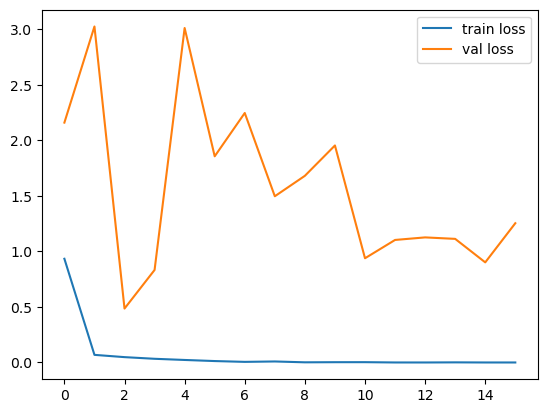

In [204]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

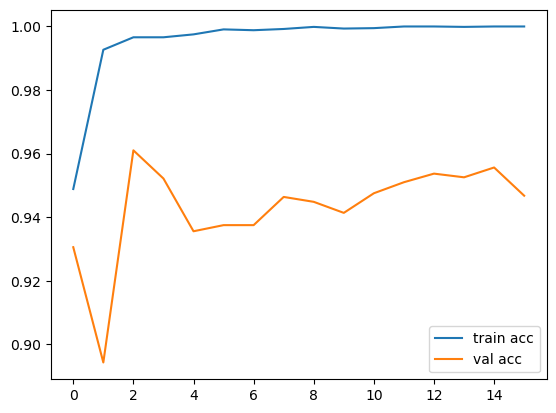

In [205]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [244]:
from keras.preprocessing import image
import numpy as np
def predict_label(img_path):
    img = image.load_img(image_path, target_size=IMAGE_SIZE)  # IMAGE_SIZE is the desired input size for your model
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)  # Apply the same preprocessing used during training
    predictions = model.predict(img)
    predicted_class = np.argmax(predictions)  # Get the class with the highest probability
    predicted_label = labels[predicted_class]
    class_probabilities = predictions[0]
    print(f"Predicted class: {predicted_label}")
    print(f"Class probabilities: {class_probabilities}")


In [245]:
# Load an image for prediction (example: image_path)
image_path = '/Users/puspakamaloli/Desktop/large_files/fruits-360-small/Validation/Apple/3_100.jpg'
predict_label(image_path)

1/1 [==============================] - 0s 47ms/step
Predicted class: Apple
Class probabilities: [1.0000000e+00 0.0000000e+00 0.0000000e+00 3.6497370e-37 0.0000000e+00
 2.4168445e-35 5.2521747e-29 4.4245402e-32 4.0050659e-26 9.6742471e-13
 0.0000000e+00 6.8352790e-28 3.5005450e-29 4.7129442e-36 8.0216722e-35
 1.1297649e-22]


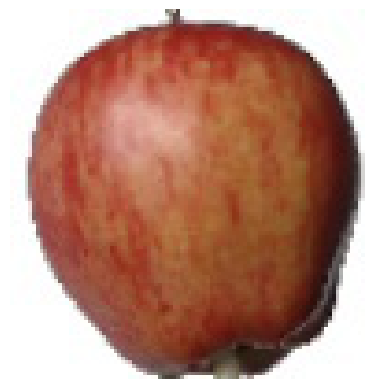

In [248]:
import matplotlib.image as mpimg
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off') 
plt.show()
